# Ciclo de Minería de Datos

![Ciclo General de KDD](ciclo-kdd.png "Ciclo General de KDD")

El objetivo del preprocesamiento es pasar de un _trozo de texto_ (documento, página web, tweet, etc), es decir, una cadena única larga y sin procesar, a una lista (o varias listas) de **tokens** limpios que sean útiles para tareas adicionales de minería de textos y/o procesamiento de lenguaje natural.

Este proceso tiene fundamentalmente tres etapas:

![Preprocesamiento de texto](ciclo-nlp.png "Preprocesamiento de texto")

# 1 - Eliminación de ruido
Son tareas que normalmente se realizan antes de la tokenización. La eliminación de ruido es más específica del dominio que las otras dos etapas (tokenización y normalización)

Las tareas de eliminación de ruido incluye:

* eliminar encabezados de archivos de texto, pies de página
* eliminar marcas HTML, XML, etc. y metadatos
* extraer datos valiosos de otros formatos, como JSON

Veamos un ejempolo de eliminación de etiquetas HTML con la ayuda de la biblioteca BeautifulSoup.


## Parsear HTML con BeautifulSoup4

In [55]:
#conda install -c anaconda beautifulsoup4 
from bs4 import BeautifulSoup

Podemos crear un objeto a partir de un archivo

In [56]:
with open("three-little-pigs.html") as fp:
    soup = BeautifulSoup(fp)
print(soup)
type(soup)


<html><head><title>Webmining course</title></head>
<body>
<p class="title"><b>Three Little Pigs</b></p>
<p class="story">Once upon a time there were three little pigs; and their names were
<a class="pig" href="http://example.com/Browny" id="link1">Browny</a>,
<a class="pig" href="http://example.com/Whitey" id="link2">Whitey</a> and
<a class="pig" href="http://example.com/Blacky" id="link3">Blacky</a>;
and they lived in a small farm.</p>
<p class="story">...</p></body></html>


bs4.BeautifulSoup

O a partir de un string

In [57]:
html_doc = """
<html><head><title>Webmining course</title></head>
<body>
<p class="main-title" id="title"><b>Three Little Pigs</b></p>

<p class="story">Once upon a time there were three little pigs; and their names were
<a href="http://example.com/Browny" class="pig" id="link1">Browny</a>,
<a href="http://example.com/Whitey" class="pig" id="link2">Whitey</a> and
<a href="http://example.com/Blacky" class="pig" id="link3">Blacky</a>;
and they lived in a small farm.</p>

<p class="story">...</p>
"""


Al crear un objeto BeautifulSoup, obtenemos la estructura anidada del HTML

In [58]:
soup = BeautifulSoup(html_doc, 'html.parser')

print(soup.prettify())

<html>
 <head>
  <title>
   Webmining course
  </title>
 </head>
 <body>
  <p class="main-title" id="title">
   <b>
    Three Little Pigs
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little pigs; and their names were
   <a class="pig" href="http://example.com/Browny" id="link1">
    Browny
   </a>
   ,
   <a class="pig" href="http://example.com/Whitey" id="link2">
    Whitey
   </a>
   and
   <a class="pig" href="http://example.com/Blacky" id="link3">
    Blacky
   </a>
   ;
and they lived in a small farm.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


Existen varias formas de navegar por esta estructura, por ejemplo, accediendo a los tags

In [59]:
soup.title

<title>Webmining course</title>

In [60]:
soup.title.name

'title'

In [61]:
soup.title.string

'Webmining course'

In [62]:
soup.title.parent.name

'head'

In [63]:
first_p = soup.p
print(first_p)

<p class="main-title" id="title"><b>Three Little Pigs</b></p>


Se pueden listar los atributos de un tag y acceder a sus atributos usando corchetes

In [64]:
print(first_p.attrs)
print(first_p['class'])

{'class': ['main-title'], 'id': 'title'}
['main-title']


También es posible cambiar un tag directamente sobre el objeto

In [65]:
first_p.name = "h1"
print(first_p)

<h1 class="main-title" id="title"><b>Three Little Pigs</b></h1>


y agregar, eliminar y editar atributos

In [66]:
first_p['id'] = 'verybold'
first_p['another-attribute'] = 1
print(first_p)

<h1 another-attribute="1" class="main-title" id="verybold"><b>Three Little Pigs</b></h1>


In [67]:
del first_p['id']
del first_p['another-attribute']
print(first_p)

<h1 class="main-title"><b>Three Little Pigs</b></h1>


In [68]:
first_p['id'] #Debería dar un error indicando que first_p no tiene un atributo id

KeyError: 'id'

In [69]:
print(first_p.get('id')) 
#No da error, sino un "None". 
#En python este valor indica que una variable no tiene valor, 
#es equivalente al null de java y otros lenguajes, pero ES un objeto y se comporta como tal

None


Los links se obtienen de forma similar

In [70]:
soup.a

<a class="pig" href="http://example.com/Browny" id="link1">Browny</a>

In [71]:
soup.find_all('a')

[<a class="pig" href="http://example.com/Browny" id="link1">Browny</a>,
 <a class="pig" href="http://example.com/Whitey" id="link2">Whitey</a>,
 <a class="pig" href="http://example.com/Blacky" id="link3">Blacky</a>]

In [72]:
soup.find_all("a", class_="pig")

[<a class="pig" href="http://example.com/Browny" id="link1">Browny</a>,
 <a class="pig" href="http://example.com/Whitey" id="link2">Whitey</a>,
 <a class="pig" href="http://example.com/Blacky" id="link3">Blacky</a>]

In [73]:
soup.find_all("a", limit=2)

[<a class="pig" href="http://example.com/Browny" id="link1">Browny</a>,
 <a class="pig" href="http://example.com/Whitey" id="link2">Whitey</a>]

In [74]:
soup.find(id="link3")

<a class="pig" href="http://example.com/Blacky" id="link3">Blacky</a>

Algo que podríamos necesitar es obtener todos los links (url) del documento:

In [75]:
for link in soup.find_all('a'):
    print(link.get('href'))

http://example.com/Browny
http://example.com/Whitey
http://example.com/Blacky


Los hijos de un tag tag’s pueden accederse utilizando **.contents**:

In [76]:
head_tag = soup.head
print("El tag head es: ",head_tag)

print("Los hijos del tag head son: ",head_tag.contents)

title_tag = head_tag.contents[0]
print("El primer hijo del tag head es: ", title_tag)

print("Los hijos del primer hijo del tag head son: ",title_tag.contents)


El tag head es:  <head><title>Webmining course</title></head>
Los hijos del tag head son:  [<title>Webmining course</title>]
El primer hijo del tag head es:  <title>Webmining course</title>
Los hijos del primer hijo del tag head son:  ['Webmining course']


En vez de obtenerlos como una lista, podemos iterar sobre los hijos usando el generador **.children**:

In [77]:
for child in title_tag.children:
    print(child)

Webmining course


Los atributos **.contents** y **.children** solo consideran los hijos directos de un tag. Por ejemplo, el tag **head** solo tiene un hijo directo **title**:

In [78]:
head_tag.contents

[<title>Webmining course</title>]

Sin embargo, el tag **title** también tiene un hijo: el string "Webmining course". El atributo **.descendants** permite iterar sobre todos los hijos (directos o no) de un tag, recursivamente:

In [79]:
for child in head_tag.descendants:
    print(child)

<title>Webmining course</title>
Webmining course


Podemos también pedir todos los strings de un documento, pero vamos a observar que no nos retorna solo el texto

In [80]:
for string in soup.strings:
    print(repr(string))

'\n'
'Webmining course'
'\n'
'\n'
'Three Little Pigs'
'\n'
'Once upon a time there were three little pigs; and their names were\n'
'Browny'
',\n'
'Whitey'
' and\n'
'Blacky'
';\nand they lived in a small farm.'
'\n'
'...'
'\n'


Se pueden eliminar todos los "espacios" extra, utilizando **.stripped_strings**
Con este atributo, se ignoran todos los strings que consisten solo de espacios y se eliminan los espacios al principio y al final de cada string. (notar que en la anteúltima linea queda sin eliminar un "\n" porque no está al principio del string)

In [81]:
for string in soup.stripped_strings:
    print(repr(string))

'Webmining course'
'Three Little Pigs'
'Once upon a time there were three little pigs; and their names were'
'Browny'
','
'Whitey'
'and'
'Blacky'
';\nand they lived in a small farm.'
'...'


Otra tarea común, es quedarnos con el texto, sin etiquetas

In [82]:
soup = BeautifulSoup(html_doc, 'html.parser')
print(soup.get_text())


Webmining course

Three Little Pigs
Once upon a time there were three little pigs; and their names were
Browny,
Whitey and
Blacky;
and they lived in a small farm.
...



De la misma forma en la que se puede ir hacia abajo en la estructura, es posible navegar hacia arriba

In [83]:
title_tag = soup.title
print("El título es: ",title_tag)

print("y su padre es: ",title_tag.parent)

El título es:  <title>Webmining course</title>
y su padre es:  <head><title>Webmining course</title></head>


También se puede iterar sobre los padres de un tag con el atributo **.parents**. :

In [84]:
link = soup.a
print("El primer link es: ",link)
print("y sus padres son: ")
for parent in link.parents:
    print(parent.name)

El primer link es:  <a class="pig" href="http://example.com/Browny" id="link1">Browny</a>
y sus padres son: 
p
body
html
[document]


## Expansión de contracciones en inglés

Aunque es parte de la *normalización*, para el idioma inglés la expansión de contracciones debe realizarse **antes** de la tokenización. Esto es que el tokenizador dividirá palabras como “did not” en “did” y “not” y, si bien no es imposible remediar esta tokenización en una etapa posterior, hacerlo antes lo hace más fácil y directo.

In [85]:
# pip install contractions
# (no disponible desde anaconda)
import contractions


text = "It's an easy task. You're expecting to expand contractions\nDon't do it, please just don't!"
sample = contractions.fix(text)
print(sample)

it is an easy task. you are expecting to expand contractions
do not do it, please just do not!


# 2 - Tokenización
La tokenización es un paso que divide cadenas de texto en piezas más pequeñas o *tokens*. Los trozos de texto más grandes pueden ser convertidos en oraciones, las oraciones pueden ser divididas en palabras, etc. El procesamiento adicional generalmente se realiza después de que una pieza de texto ha sido apropiadamente concatenada. La tokenización también se conoce como *segmentación de texto* o *análisis léxico*. 

Si bien **segmentación** y **tokenización** a veces se utilizan indistintamente, siendo precisos **segmentación** se usa para referirse al desglose de un gran trozo de texto en partes más grandes que las palabras (por ejemplo, párrafos u oraciones), mientras que la tokenización se reserva para el proceso de desglose que se produce exclusivamente en palabras.

## NLTK
**NLTK** es un kit de herramientas de lenguaje natural y una de las bibliotecas NLP más conocidas y más utilizadas en el ecosistema de Python, útil para todo tipo de tareas, desde tokenización, hasta etiquetado de parte del habla (POS tagging), etc.
 - Es una biblioteca especializada en procesamiento de lenguaje natural
 - Recursos léxicos
 - Tokenización de palabras y oraciones
 - PoS Tagging
 - Identificación de entidades nombradas (NER)
 - Técnicas de minería de texto (por ejemplo clasificación)


In [86]:
# conda install -c anaconda nltk 

import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Separación de oraciones

In [87]:
from nltk import sent_tokenize
text = 'The quick brown fox jumed! where? Over the 2 lazy dogs.'
sentences = sent_tokenize(text)
print(sentences)

['The quick brown fox jumed!', 'where?', 'Over the 2 lazy dogs.']


### Separación de palabras

In [88]:
    from nltk import word_tokenize
for sentence in sentences:
    words = word_tokenize(sentence)
    print(words)

['The', 'quick', 'brown', 'fox', 'jumed', '!']
['where', '?']
['Over', 'the', '2', 'lazy', 'dogs', '.']


In [89]:
prueba = word_tokenize(text)
print(prueba)

['The', 'quick', 'brown', 'fox', 'jumed', '!', 'where', '?', 'Over', 'the', '2', 'lazy', 'dogs', '.']


Funciona para texto de redes sociales?

In [90]:
tweet = '@mg_armentano: an example! :D http://example.com #NLP'
print(word_tokenize(tweet))

['@', 'mg_armentano', ':', 'an', 'example', '!', ':', 'D', 'http', ':', '//example.com', '#', 'NLP']


In [91]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
tweet = '@mg_armentano: an example! :D http://example.com #NLP'
print(tokenizer.tokenize(tweet))

['@mg_armentano', ':', 'an', 'example', '!', ':D', 'http://example.com', '#NLP']


### Textos de ejemplo

In [92]:
from nltk.book import *
print(text1)
type(text1)

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
<Text: Moby Dick by Herman Melville 1851>


nltk.text.Text

Conceptualmente, un objeto **nltk.Text** no es más que una lista ordenada de tokens, siendo esto la unidad mínima de un texto, simplemente palabras o signos de puntuación. 

In [93]:
text1[0:20]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.',
 '(',
 'Supplied',
 'by',
 'a',
 'Late',
 'Consumptive',
 'Usher',
 'to',
 'a',
 'Grammar']

### Carga de textos desde url

In [94]:
from urllib import request

url = "http://www.gutenberg.org/cache/epub/3748/pg3748.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')

print(type(raw))
print(len(raw))
print(raw[:75])

<class 'str'>
448614
﻿Project Gutenberg's A Journey to the Interior of the Earth, by Jules Verne


In [95]:
from nltk import word_tokenize

tokens = word_tokenize(raw)
print(type(tokens))
print(len(tokens))
print(tokens[:10])

<class 'list'>
91752
['\ufeffProject', 'Gutenberg', "'s", 'A', 'Journey', 'to', 'the', 'Interior', 'of', 'the']


Creamos un objeto Text a partir de la secuencia de tokens

In [96]:
import nltk
text = nltk.Text(tokens)
print(type(text))
print(len(text))
print(text[:10])

<class 'nltk.text.Text'>
91752
['\ufeffProject', 'Gutenberg', "'s", 'A', 'Journey', 'to', 'the', 'Interior', 'of', 'the']


## Generación de bigramas

In [97]:
list(bigrams(text))[0:15]

[('\ufeffProject', 'Gutenberg'),
 ('Gutenberg', "'s"),
 ("'s", 'A'),
 ('A', 'Journey'),
 ('Journey', 'to'),
 ('to', 'the'),
 ('the', 'Interior'),
 ('Interior', 'of'),
 ('of', 'the'),
 ('the', 'Earth'),
 ('Earth', ','),
 (',', 'by'),
 ('by', 'Jules'),
 ('Jules', 'Verne'),
 ('Verne', 'This')]

# 3 - Normalización
La normalización  se refiere a una serie de tareas destinadas a poner todo el texto en igualdad de condiciones: convirtiendo todo el texto a mayúsculas o minúsculas, eliminando la puntuación, convirtiendo los números a sus equivalentes de palabras. La normalización pone todas las palabras en pie de igualdad, y permite que el procesamiento proceda de manera uniforme.

La normalización del texto puede significar realizar una serie de tareas, pero para nuestro marco abordaremos la normalización en 3 pasos distintos: (1) derivación, (2) lematización y (3) todo lo demás. 

Después de la tokenización, ya no estamos trabajando en un nivel de texto sino a nivel de palabra.

### Eliminar caracteres no ASCII de una lista de palabras tokenizadas

In [98]:
import unicodedata
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

print(tokens[:20])
tokens = remove_non_ascii(tokens)
print(tokens[:20])

['\ufeffProject', 'Gutenberg', "'s", 'A', 'Journey', 'to', 'the', 'Interior', 'of', 'the', 'Earth', ',', 'by', 'Jules', 'Verne', 'This', 'eBook', 'is', 'for', 'the']
['Project', 'Gutenberg', "'s", 'A', 'Journey', 'to', 'the', 'Interior', 'of', 'the', 'Earth', ',', 'by', 'Jules', 'Verne', 'This', 'eBook', 'is', 'for', 'the']


### Pasar a minúsculas

In [99]:
def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

tokens_low = to_lowercase(tokens)
print(tokens_low[:20])

['project', 'gutenberg', "'s", 'a', 'journey', 'to', 'the', 'interior', 'of', 'the', 'earth', ',', 'by', 'jules', 'verne', 'this', 'ebook', 'is', 'for', 'the']


### Eliminar signos de puntuación

In [100]:
import re
def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

tokens_clean = remove_punctuation(tokens_low)
print(tokens_clean[:20])

['project', 'gutenberg', 's', 'a', 'journey', 'to', 'the', 'interior', 'of', 'the', 'earth', 'by', 'jules', 'verne', 'this', 'ebook', 'is', 'for', 'the', 'use']



### Reemplazar números por su equivalente textual
Usamos el módulo **inflect** que nos permite generar plurales, singulares, ordinales, artículos indefinidos y convertir números en palabras

In [101]:
# conda install -c conda-forge inflect 
import inflect
from nltk import word_tokenize

def replace_numbers(words):
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

example = "She ran 100 meters and rested for 1 minute"
words = word_tokenize(example)
words = replace_numbers(words)
print(words)

['She', 'ran', 'one hundred', 'meters', 'and', 'rested', 'for', 'one', 'minute']


### Eliminar stopwords

In [102]:
from nltk.corpus import stopwords

def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

tokens_sin_stopwords = remove_stopwords(tokens_clean)
print(tokens_sin_stopwords[:20])

['project', 'gutenberg', 'journey', 'interior', 'earth', 'jules', 'verne', 'ebook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'reuse']


## stemmers

In [103]:
list(tokens_sin_stopwords)[0:20]

['project',
 'gutenberg',
 'journey',
 'interior',
 'earth',
 'jules',
 'verne',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'cost',
 'almost',
 'restrictions',
 'whatsoever',
 'may',
 'copy',
 'give',
 'away',
 'reuse']

In [104]:
porter = nltk.PorterStemmer()
list(porter.stem(t) for t in tokens_sin_stopwords)[0:20]

['project',
 'gutenberg',
 'journey',
 'interior',
 'earth',
 'jule',
 'vern',
 'ebook',
 'use',
 'anyon',
 'anywher',
 'cost',
 'almost',
 'restrict',
 'whatsoev',
 'may',
 'copi',
 'give',
 'away',
 'reus']

In [105]:
lancaster = nltk.LancasterStemmer()
list(lancaster.stem(t) for t in tokens_sin_stopwords)[0:20]

['project',
 'gutenberg',
 'journey',
 'intery',
 'ear',
 'jul',
 'vern',
 'ebook',
 'us',
 'anyon',
 'anywh',
 'cost',
 'almost',
 'restrict',
 'whatsoev',
 'may',
 'cop',
 'giv',
 'away',
 'reus']

## Lematización
A diferencia del stemming, el lematizador solo elimina el final de la palabra si la palabra resultante se encuentra en el diccionario. Esto lo hace un proceso más lento que el stemming.

In [106]:
import nltk
wnl = nltk.WordNetLemmatizer()
list(wnl.lemmatize(t) for t in tokens_sin_stopwords)[0:20]

['project',
 'gutenberg',
 'journey',
 'interior',
 'earth',
 'jules',
 'verne',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'cost',
 'almost',
 'restriction',
 'whatsoever',
 'may',
 'copy',
 'give',
 'away',
 'reuse']

In [107]:
t1 = "I visited two beautiful libraries"
tokens_t = word_tokenize(t1)
print(list(lancaster.stem(t) for t in tokens_t)[0:20])
print(list(wnl.lemmatize(t) for t in tokens_t)[0:20])

['i', 'visit', 'two', 'beauty', 'libr']
['I', 'visited', 'two', 'beautiful', 'library']


----

# Exploración del texto

### Algunas estadísticas del texto
NLTK provee diferentes documentos de ejemplo. Podemos buscar calcular algunas estadísticas de algunos documentos

In [108]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))                              # raw() indica cuántas letras tiene el texto
    num_words = len(gutenberg.words(fileid))                            # words() divide el texto en palabras
    num_sents = len(gutenberg.sents(fileid))                            # sents() divide el texto en oraciones, donde cada oración es una lista de palabras
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))    # contamos la cantidad de palabras únicas
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)   
    # promedio de longitud de las palabras, de las oraciones, cantidad de veces que cada palabra aparece en el texto en promedio

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


### Búsqueda con contexto

In [115]:
type(text1)

nltk.text.Text

In [116]:
text1.concordance("sea") #text1 es Moby Dick

Displaying 25 of 455 matches:
 shall slay the dragon that is in the sea ." -- ISAIAH " And what thing soever 
 S PLUTARCH ' S MORALS . " The Indian Sea breedeth the most and the biggest fis
cely had we proceeded two days on the sea , when about sunrise a great many Wha
many Whales and other monsters of the sea , appeared . Among the former , one w
 waves on all sides , and beating the sea before him into a foam ." -- TOOKE ' 
mediately lost and swallowed up , the sea - gudgeon retires into it in great se
e ." -- PILGRIM ' S PROGRESS . " That sea beast Leviathan , which God of all hi
s in , and at his breath spouts out a sea ." -- IBID . " The mighty whales whic
. " The mighty whales which swim in a sea of water , and have a sea of oil swim
h swim in a sea of water , and have a sea of oil swimming in them ." -- FULLLER
RANS . A . D . 1668 . " Whales in the sea God ' s voice obey ." -- N . E . PRIM
ad of some of them , that when out at sea they are afraid to mention even their
 take any 

### Obtener colocaciones
Las colocaciones son unidades fraseológicas de dos o más palabras que se usan muy habitualmente combinadas, más de lo que probabilísticamente se daría. Por ejemplo, en español "alto riesgo", "sin duda", "no hay problema".

In [117]:
text1.collocations()

ValueError: too many values to unpack (expected 2)

In [112]:
text2.collocations()

ValueError: too many values to unpack (expected 2)

Las colocaciones son muy específicas del tipo de texto. Por ejemplo, para obtener "red wine" como colocación, deberíamos procesar un texto mucho más largo y que trate sobre vinos.

### Similitud distribucional
Permite buscar palabras que aparecen en los mismos contextos de una palabra dada

In [120]:
text1.similar("sea")

whale ship world deck other pequod captain boat air time water way
line whales head wind crew last thing matter


### Palabras más comunes

FreqDist permite obtener la distribución de frecuencias de un texto. FreqDist puede verse como un diccionario en el que la clave es la palabra y el valor es la frecuencia correspondiente.

In [121]:
from nltk import FreqDist
fdist1 = FreqDist(text1)
#imprimimos las 500 palabras más frecuentes con una longitud de al menos 5 letras
print([i for i in fdist1.most_common(500) if len(i[0]) > 5])

[('though', 335), ('before', 293), ('seemed', 283), ('Queequeg', 252), ('little', 247), ('whales', 237), ('through', 227), ('Captain', 215), ('himself', 203), ('Starbuck', 196), ('almost', 186), ('should', 181), ('Pequod', 172), ('without', 154), ('CHAPTER', 150), ('thought', 149), ('against', 132), ('things', 132), ('something', 119), ('between', 117), ('called', 116), ('whaling', 116), ('captain', 112), ('towards', 107), ('another', 106), ('moment', 105), ('nothing', 102), ('strange', 96), ('voyage', 93), ('certain', 87), ('matter', 86), ('Nantucket', 85), ('itself', 84), ('perhaps', 82), ('indeed', 82), ('sometimes', 81), ('however', 80), ('always', 80), ('present', 80), ('within', 78), ('length', 78), ('instant', 77), ('harpooneer', 77), ('whether', 76), ('harpoon', 76), ('Bildad', 76), ('beneath', 74), ('enough', 74), ('living', 73), ('because', 73), ('standing', 73), ('whalemen', 71), ('cannot', 69), ('waters', 69), ('myself', 68), ('looking', 68), ('rather', 68), ('morning', 68)

Otras funciones interesantes de FreqDist

 - fdist.values(): Devuelve la cantidad de veces que aparece cada palabra
 - fdist.N(): Total de palabras en el texto
 - fdist[word]: Cantidad de ocurrencias de word
 - fdist.freq(word): Devuelve la frecuencia de aparación de word (cantidad de ocurrencias / cantidad total de palabras)
 - fdist.max(): Palabra con máxima frecuencia
 - fdist.plot(): Representación gráfica

In [122]:
print(fdist1['whales'])
print(fdist1.N())
print(fdist1.freq('whales'))
x = fdist1['whales'] / fdist1.N()
print(x)

237
260819
0.0009086761317235324
0.0009086761317235324


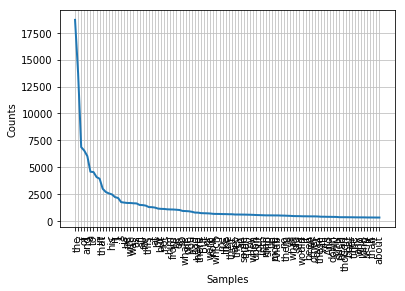

In [124]:
# conda install -c conda-forge matplotlib
%matplotlib inline 
fdist1.plot(100)

### Dispersión de una palabra
Podemos también ver gráficamente como evoluciona la aparición de una palabra a lo largo del documento

In [ ]:
text1.dispersion_plot(["sea", "whales", "Starbuck","savage"])

----

# Extracción de información del texto

## Wordnet
Wordnet es un diccionario semántico, similar a un tesauro pero con una estructura más rica. NLTK incluye wordnet en inglés con 155287 palabras y 117659 conjuntos de sinónimos.

### Synsets
En Wordnet, los conjuntos de sinónimos se conocen como **synsets**

In [ ]:
from nltk.corpus import wordnet as wn
print("Synset en el que se encuentra automobile: ",wn.synsets('automobile') ) 

In [ ]:
print("Exploramos el synset car.n.01")
print("Otras palabras en el mismo synset: ",wn.synset('car.n.01').lemma_names() )       
print("Definición del synset car.n.01: ",wn.synset('car.n.01').definition())
print("Ejemplos de uso de la palabra: ",wn.synset('car.n.01').examples())

In [ ]:
print("Exploramos el synset automobile.v.01")
print("Otras palabras en el mismo synset: ",wn.synset('automobile.v.01').lemma_names() )       
print("Definición del synset automobile.v.01: ",wn.synset('automobile.v.01').definition())
print("Ejemplos de uso de la palabra: ",wn.synset('automobile.v.01').examples())

### Hipónimos e hipernónimos
Los synsets de wordnet corresponden a conceptos abstractos, y no siempre poseen una palabra que los describan. Estos conceptos están conectados entre sí en una jerarquía.
Los métodos para acceder a esta jerarquía son hyponyms() y hypernyms().

In [ ]:
automobile = wn.synset('car.n.01')

types_of_automobile = automobile.hyponyms()
print("Tipos de automobile: ")
for t in types_of_automobile:
    print(t)

parent_of_automobile = automobile.hypernyms()
print("\nPadres de automobile: ",parent_of_automobile)
print("(",wn.synset('motor_vehicle.n.01').definition(),")")

paths = automobile.hypernym_paths()
print("\nTodos los ""ancestros"" de automobile son: ")
for l in paths:
    for w in l:
        print(w)
    print("\n")

### Similitud semántica

Dado un synset particular, podemos recorrer la red de WordNet para encontrar synsets con significados similares. Saber qué palabras son semánticamente similares puede ser útil para indexar una colección de documentos, de tal forma que cuando buscamos un término general encuentre documentos con términos más específicos.

Una forma de saber si un concepto es general o específico es ver la profundidad del synset. **path_similarity** asigna un valor en el rango 0-1 basado en el camino más corto que conecta el concepto en la herarquía de hypernónimos (retorna -1 si no se encuentra un camino). Comparar un synset consigo mismo retorna 1.

In [ ]:
right_whale = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
tortoise = wn.synset('tortoise.n.01')

print("Comparación semántica entre la ballena franca y la orca")
print("Hipernónimo común más cercano: ",right_whale.lowest_common_hypernyms(orca))
print("Distancia mínima desde la raiz de conceptos de la orca: ",orca.min_depth())
print("Distancia mínima desde la raiz de conceptos de la ballena franca: ",right_whale.min_depth())
print("Similitud semántica: ",right_whale.path_similarity(orca))
print("\nComparación semántica entre la ballena franca y la tortuga")
print("Hipernónimo común más cercano: ",right_whale.lowest_common_hypernyms(tortoise))
print("Distancia mínima desde la raiz de conceptos de la tortuga: ",tortoise.min_depth())
print("Distancia mínima desde la raiz de conceptos de la ballena franca: ",right_whale.min_depth())
print("Similitud semántica:",right_whale.path_similarity(tortoise))

### Part of Speach (PoS) tagging

#### Penn Treebank tagset
![Penn Treebank tagset](penn-tagset.png "Penn Treebank tagset")

In [ ]:
text = word_tokenize("Mike rowed his boat in 1997")
pos_tagged = nltk.pos_tag(text)
print(pos_tagged)

In [ ]:
print(nltk.ne_chunk(pos_tagged))

----

# Práctico 1

* Descargar los 27 capítulos del libro "The little prince (Antoine de Saint Exupéry)" a partir de la siguiente url: http://www.angelfire.com/hi/littleprince/frames.html
* Identificar las stopwords particulares para este texto. Justificar.
* Eliminar ruido, tokenizar y normalizar el texto descargado con las tareas que considere convenientes.
* Presentar un gráfico con la dispersión de las palabras little, prince, sheep, planet, astronomer, king, rose

